In [150]:
# initialize
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

def myReadtxt(inFileName,skipLines=0,col=5):
    with open(inFileName) as fin:
        for i in range(0,skipLines):
            fin.readline()
        myList = []
        for line in fin:
            s_line = line.strip().split()
            kx = float(s_line[0])
            ky = float(s_line[1])
            intensity = float(s_line[col])
            myList.append([ky,kx,intensity])
        return myList

def plotData(dataArray,markerSize=1,**kwargs):
    kx = dataArray[:,0]
    ky = dataArray[:,1]
    intensity = dataArray[:,2]
    fig, ax = plt.subplots(1,1)
    ax.axis('equal')
#     ax.axis('off')
    cax = ax.scatter(kx, ky, c=intensity, cmap='jet',linewidths=0.0,marker='s',s=markerSize)
    for key in kwargs:
        if (key == 'vmin'):
            cax.set_clim(vmin=kwargs[key])
        elif (key == 'vmax'):
            cax.set_clim(vmax=kwargs[key])
    fig.colorbar(cax,ax=ax)
    return fig,ax

def plotDataLog(dataArray,markerSize=1,**kwargs):
    kx = dataArray[:,0]
    ky = dataArray[:,1]
    intensity = dataArray[:,2]
    fig, ax = plt.subplots(1,1)
    ax.axis('equal')
#     ax.axis('off')
    cax = ax.scatter(kx, ky, c=intensity, linewidths=0.0,marker='s',s=markerSize, norm=LogNorm())
    for key in kwargs:
        if (key == 'vmin'):
            cax.set_clim(vmin=kwargs[key])
        elif (key == 'vmax'):
            cax.set_clim(vmax=kwargs[key])
    cbar = plt.colorbar(cax)
    cbar.set_ticks([1e-2,1e9])
    return fig,ax
def calcIntensity(r_s, q_min=(-5,-5,-5),q_max = (5,5,5),n_q = (100,100,1)):
    # q_min = [qx_min, qy_min, qz_min]
    # q_min = np.array([-.01,-.01,-.01])
    # q_max = np.array([.01,.01,.01])
    # n_q = np.array([10,10,10])
    N_r = len(r_s)
    q_step = (np.array(q_max)-np.array(q_min))/np.array(n_q)
    intensity = np.zeros(np.prod(n_q))
    ################ TEST ###############
    qx = []
    qy = []
    #####################################
    for i in range(np.prod(n_q)):
        i_z = i % n_q[2];
        i_y = (i // n_q[2]) % n_q[1];
        i_x = i // (n_q[2] * n_q[1]);
        q = []
        q.append(q_min[0] + q_step[0] * i_x);
        q.append(q_min[1] + q_step[1] * i_y);
        q.append(q_min[2] + q_step[2] * i_z);
        ################ TEST ###############
        qx.append(q[0])
        qy.append(q[1])
        #####################################
        sumfcoskr = 0;
        sumfsinkr = 0;
        for j in range(N_r):
            dotkr = q[0] * r_s[j][0] + q[1] * r_s[j][1] + q[2] * r_s[j][2];
            factor = 1
            sumfcoskr += factor * np.cos(dotkr);
            sumfsinkr += factor * np.sin(dotkr);

        intensity[i] = (sumfcoskr*sumfcoskr + sumfsinkr*sumfsinkr)/N_r
        percent = i/np.prod(n_q)*100
        if (percent%10 == 0):
            print(i,"/",np.prod(n_q))
    print ("Done")
    ################ TEST ###############
    return qx,qy,intensity

# Square wave function
 $x(t) = {\rm sgn}(\sin(t/T)) = {\rm sgn}(\sin ft)$

# Validation 01

<IPython.core.display.Javascript object>


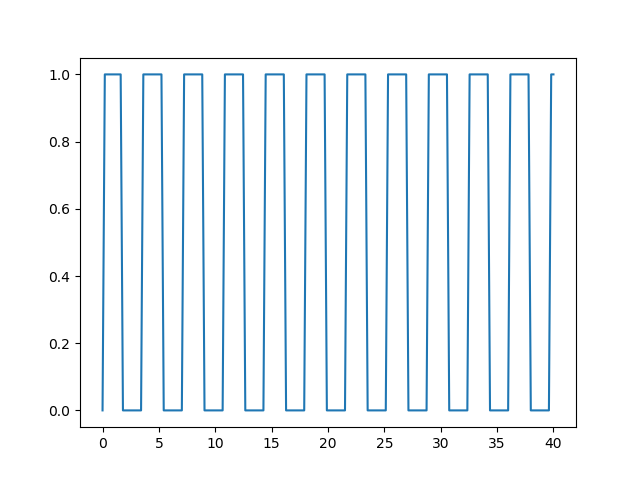

In [167]:
# define period
T = 3.615
t = np.linspace(0, 40, 200)
# x = np.sign(np.sin(t*2*np.pi/T))
x = np.sign(np.sin(2*np.pi/T * t))
x[x<0] = 0
plt.figure()
plt.plot(t,x)

<IPython.core.display.Javascript object>


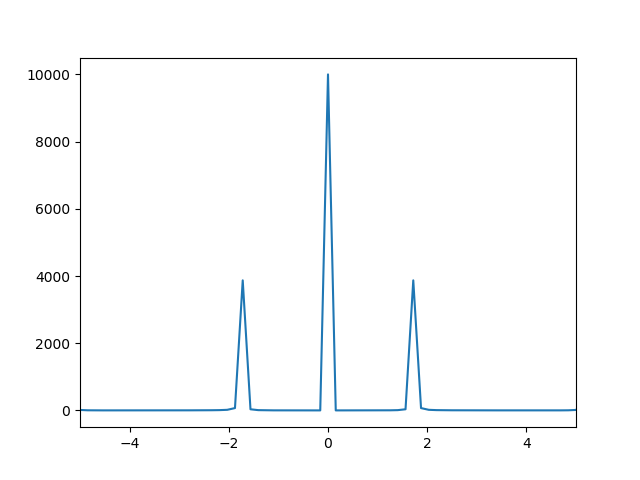

(-5, 5)

In [170]:
dummy = np.fft.fft(x)
fft1d = np.fft.fftshift(dummy)
k = np.fft.fftfreq(200, d=t[2]-t[1])
q = np.fft.fftshift(k)*2*np.pi
inten1d = abs(fft1d)**2

plt.figure()
plt.plot(q,inten1d)
plt.xlim((-5,5))

<IPython.core.display.Javascript object>


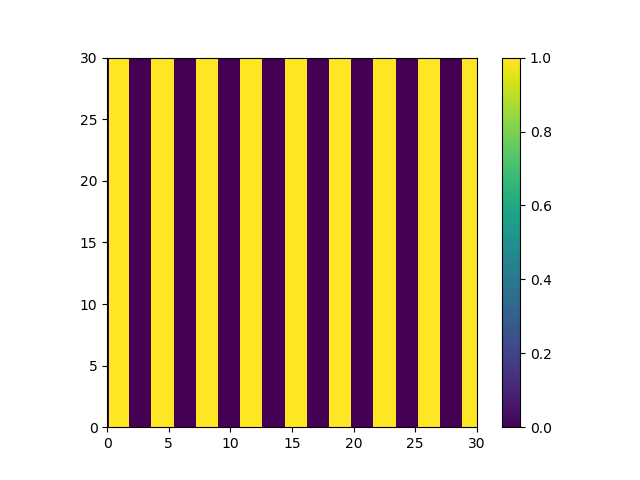

In [28]:
# plot structure
data = np.zeros((200,200))
data [:,x>0] = 1
plt.figure()
plt.imshow(data, origin='lower', extent=(0,30,0,30))
plt.colorbar()

<IPython.core.display.Javascript object>


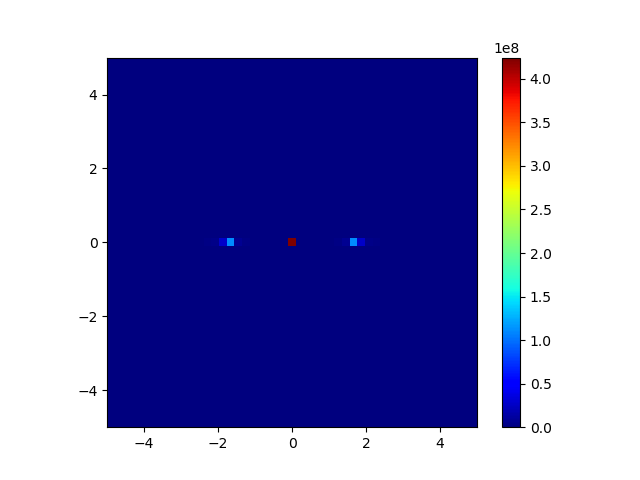

(-5, 5)

In [103]:
# FFT results
dummy = np.fft.fftn(data)
FT = np.fft.fftshift(dummy)
k = np.fft.fftfreq(200, d=t[2]-t[1])
q = np.fft.fftshift(k)*2*np.pi
Inten = abs(FT)**2
# plt.figure()
# plt.imshow(Inten, origin='lower', extent=(min(q),max(q),min(q),max(q)))
# plt.colorbar()
plt.figure()
plt.imshow(Inten, origin='lower', extent=(min(q),max(q),min(q),max(q)), cmap='jet')
plt.colorbar()
plt.xlim(-5,5)
plt.ylim(-5,5)

In [172]:
# my DFT
# create structure
T = 3.615
X = np.arange(0,30,T)
Y = np.arange(0,30,0.1)
Z = np.arange(0,1,2)
na = X.shape[0] * Y.shape[0] * Z.shape[0]
r_s = []

for nn in range(5):
    X += 0.5
    for i in X:
        for j in Y:
            for k in Z:
                r_s.append(np.array((i, j , k)))

<IPython.core.display.Javascript object>


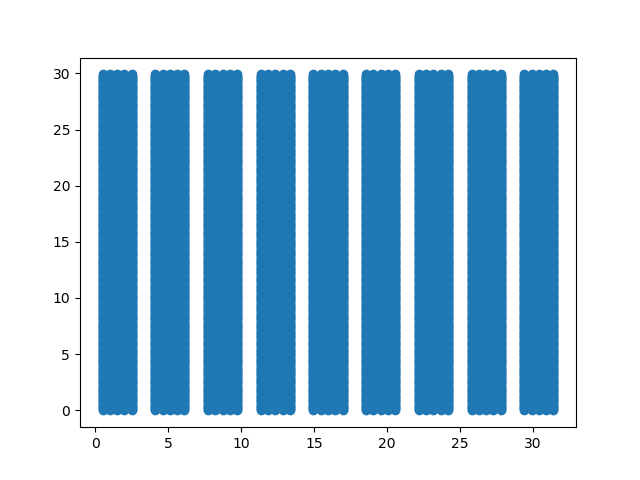

In [173]:
r_s_a = np.array(r_s)
plt.figure()
plt.scatter(r_s_a[:,0],r_s_a[:,1])

In [174]:
# qx, qy, intensity = calcIntensity(r_s,q_min,q_max,n_q)
dData = np.column_stack(calcIntensity(r_s,(-5,-5,0)))

0 / 10000
1000 / 10000
2000 / 10000
3000 / 10000
4000 / 10000
5000 / 10000
6000 / 10000
7000 / 10000
8000 / 10000
9000 / 10000
Done


<IPython.core.display.Javascript object>


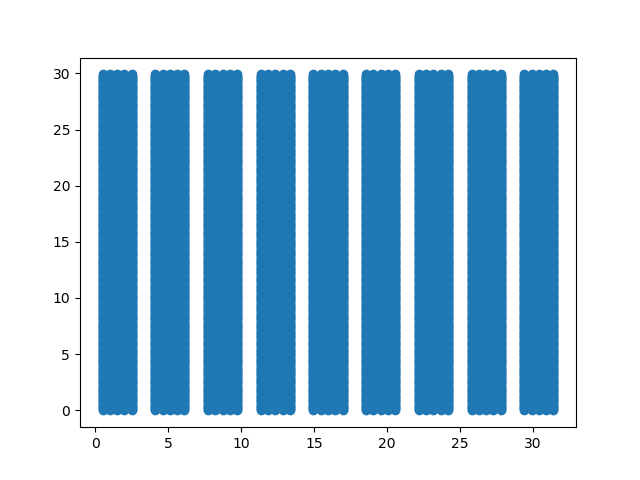

In [177]:
# my DFT plot structure
# r_s_a = np.array(r_s)
# plt.figure()
# plt.scatter(r_s_a[:,0], r_s_a[:,1])
r_s_a = np.array(r_s)
plt.figure()
plt.scatter(r_s_a[:,0],r_s_a[:,1])

<IPython.core.display.Javascript object>


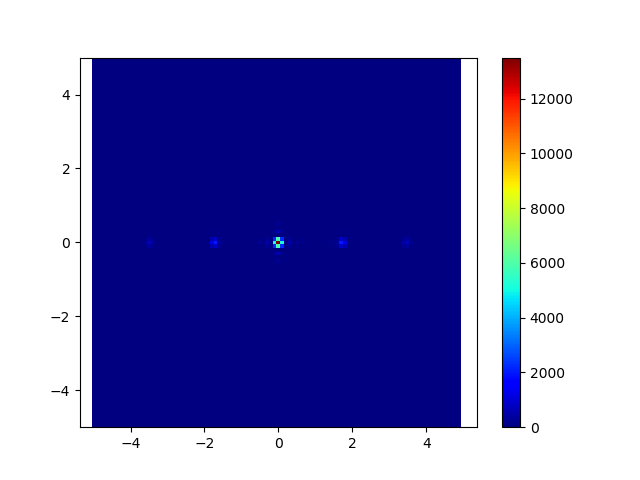

(-5, 5)

In [178]:
fig, ax = plotData(dData,8)
ax.set_xlim([-5,5])
ax.set_ylim([-5,5])

<IPython.core.display.Javascript object>


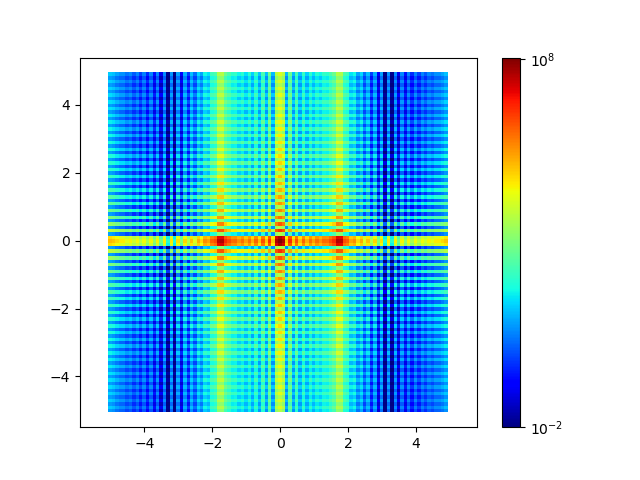

<IPython.core.display.Javascript object>


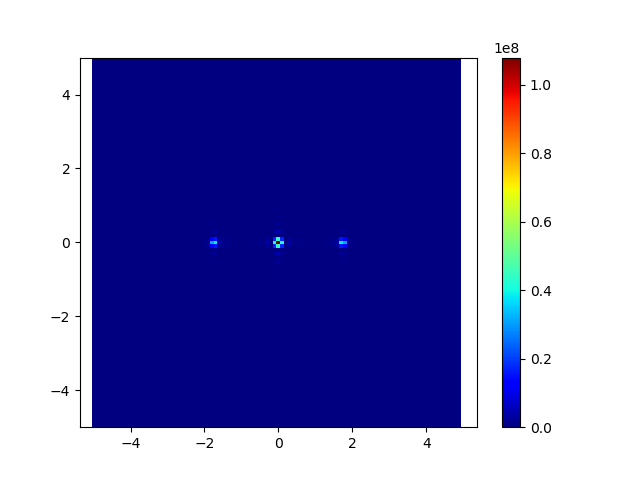

(-5, 5)

In [137]:
# plugin data
dataPath = '/bigdata/hplsim/scratch/ee68/pluginValidation/myCell14/simOutput/saxsOutput/'
pData = np.array(myReadtxt(dataPath+'e_saxs_0.dat',2,3))
fig, ax = plotDataLog(pData,8,vmin=1e-2)
fig, ax = plotData(pData,8)
ax.set_xlim([-5,5])
ax.set_ylim([-5,5])

# Validation 02

<IPython.core.display.Javascript object>


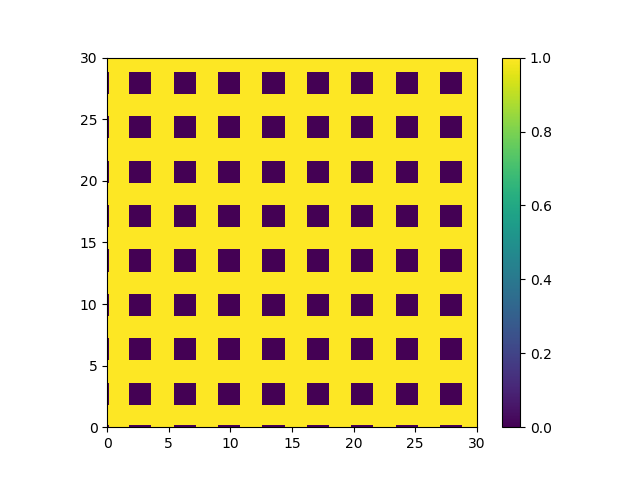

In [139]:
# plot structure
data = np.zeros((200,200))
data [:,x>0] = 1
data [x>0,:] = 1
plt.figure()
plt.imshow(data, origin='lower', extent=(0,30,0,30))
plt.colorbar()

<IPython.core.display.Javascript object>


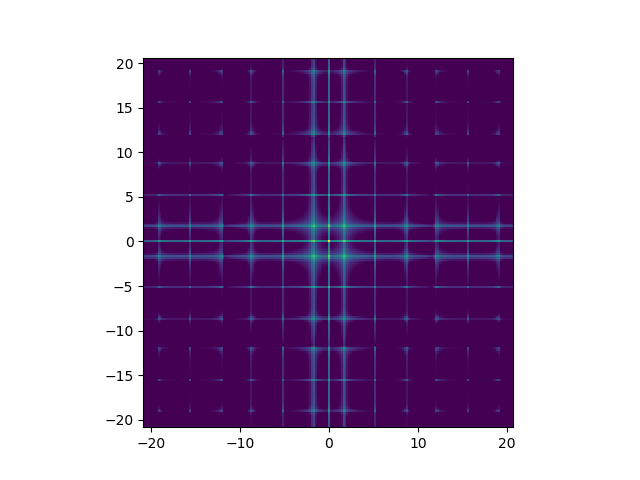

<IPython.core.display.Javascript object>


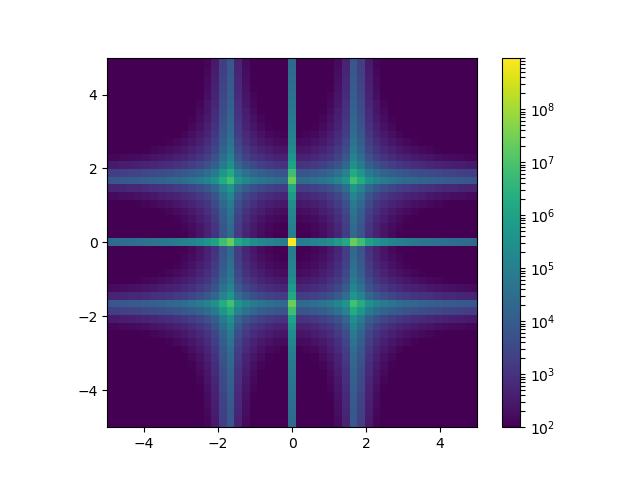

(-5, 5)

In [141]:
# FFT
dummy = np.fft.fftn(data)
FT = np.fft.fftshift(dummy)
k = np.fft.fftfreq(200, d=t[2]-t[1])
q = np.fft.fftshift(k)*2*np.pi
Inten = abs(FT)**2

plt.figure()
plt.imshow(Inten, origin='lower', extent=(min(q),max(q),min(q),max(q)),norm=LogNorm(vmin=1e2))
plt.colorbar

plt.figure()
plt.imshow(Inten, origin='lower', extent=(min(q),max(q),min(q),max(q)),norm=LogNorm(vmin=1e2))
plt.colorbar()
plt.xlim(-5,5)
plt.ylim(-5,5)

In [159]:
# my DFT create structure
X = np.arange(0,30,T)
Y = np.arange(0,30,T)
Z = np.arange(0,1,2)
na = X.shape[0] * Y.shape[0] * Z.shape[0]
r_s = []
for i in X:
    for j in Y:
        for k in Z:
            r_s.append((i, j , k))

# qx, qy, intensity = calcIntensity(r_s,q_min,q_max,n_q)
dData = np.column_stack(calcIntensity(r_s))

0 / 10000
1000 / 10000
2000 / 10000
3000 / 10000
4000 / 10000
5000 / 10000
6000 / 10000
7000 / 10000
8000 / 10000
9000 / 10000
Done


<IPython.core.display.Javascript object>


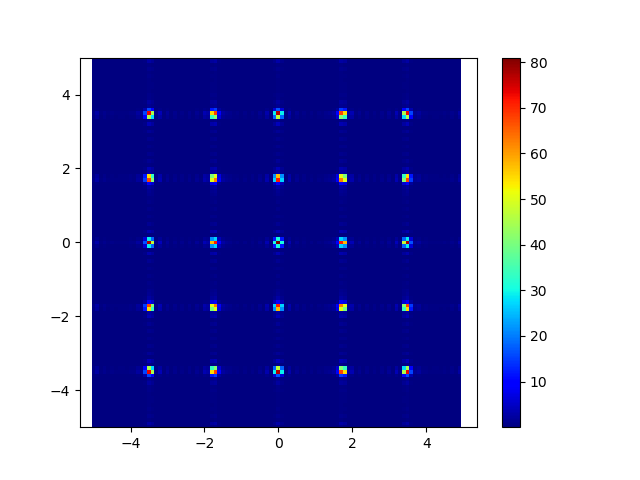

(-5, 5)

In [160]:
# my DFT plot figure
fig, ax = plotData(dData,8)
ax.set_xlim([-5,5])
ax.set_ylim([-5,5])

In [157]:
def plotDataLog(dataArray,markerSize=1,**kwargs):
    kx = dataArray[:,0]
    ky = dataArray[:,1]
    intensity = dataArray[:,2]
    fig, ax = plt.subplots(1,1)
    ax.axis('equal')
#     ax.axis('off')
    plt.scatter(kx, ky, c=intensity, linewidths=0.0,marker='s',s=markerSize, norm=LogNorm(vmin=1e2, vmax=1e9))
    plt.colorbar()
    plt.xlim([-5,5])
    plt.ylim([-5,5])
    return fig,ax

<IPython.core.display.Javascript object>


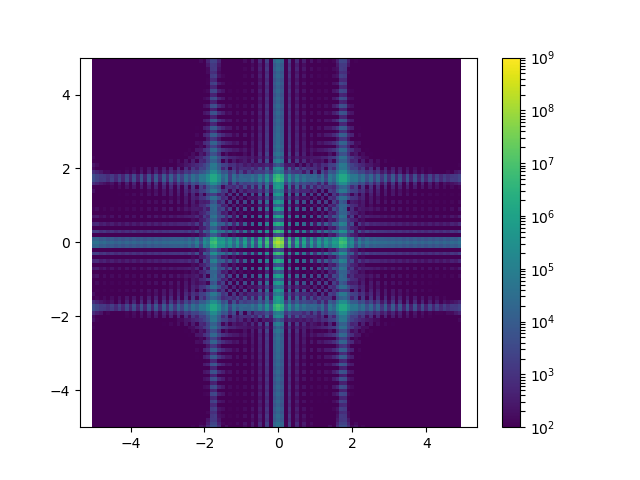

<IPython.core.display.Javascript object>


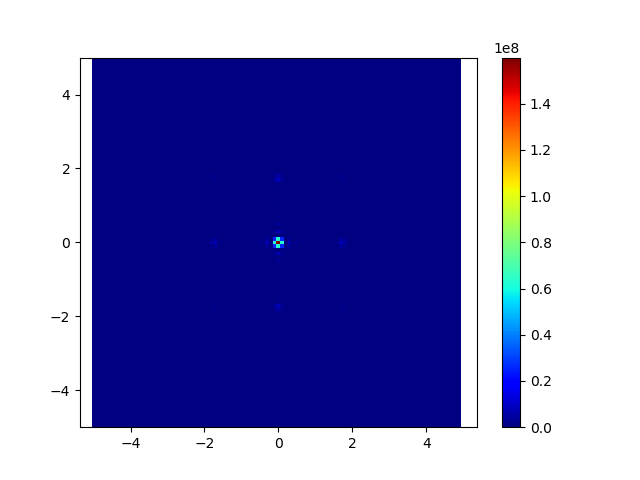

(-5, 5)

In [158]:
# plugin data
dataPath = '/bigdata/hplsim/scratch/ee68/pluginValidation/2dCell01/simOutput/saxsOutput/'
pData = np.array(myReadtxt(dataPath+'e_saxs_0.dat',2,3))
fig, ax = plotDataLog(pData,8,vmin=1e2, vmax=1e9)
fig, ax = plotData(pData,8)
ax.set_xlim([-5,5])
ax.set_ylim([-5,5])

# This is a validation

$x (\unicode{x212B}^{-1}) = x \frac{1}{10^{-10} \rm{m}}$